In [97]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import FinanceDataReader as fdr
import matplotlib.gridspec as gridspec
import matplotlib as mat
from datetime import datetime

In [84]:
# 2019-01-01~2022-12-30 기간 중 시가총액 상위 5개주

korean=fdr.DataReader('003490','2020-01-01','2022-12-30') # 대한항공
jeju=fdr.DataReader('089590','2020-01-01','2022-12-30') # 제주항공
jin=fdr.DataReader('272450','2020-01-01','2022-12-30') # 진에어
busan=fdr.DataReader('298690','2020-01-01','2022-12-30') # 에어부산

## 항공주 종가, 거래량, 변화율

In [85]:
airline_close = pd.concat([korean.Close, jeju.Close, jin.Close, tway.Close, busan.Close], axis = 1,ignore_index = False)
airline_close.columns = ['korean','jeju','jin','tway','busan']
airline_close

,korean,jeju,jin,tway,busan
Date,,,,,
2020-01-02,18058,20687,13289,3022,11350
2020-01-03,17701,20304,13246,3032,11488
2020-01-06,17183,19387,12856,2855,10975
2020-01-07,17410,19654,12986,2866,10816
2020-01-08,17053,18814,13203,2698,10224
...,...,...,...,...,...
2022-12-23,24400,13900,16450,2390,2335
2022-12-26,24300,13950,16400,2475,2535
2022-12-27,24200,14650,16900,2610,2640


In [86]:
airline_volume = pd.concat([korean.Volume, jeju.Volume, jin.Volume, tway.Volume, busan.Volume], axis = 1,ignore_index = False)
airline_volume.columns = ['korean','jeju','jin','tway','busan']
airline_volume

,korean,jeju,jin,tway,busan
Date,,,,,
2020-01-02,303459,70589,100738,224594,306236
2020-01-03,572272,329080,132958,230970,222202
2020-01-06,690224,262226,577988,713155,317740
2020-01-07,388103,96943,127604,435688,238932
2020-01-08,676198,260555,353626,902778,523765
...,...,...,...,...,...
2022-12-23,801714,1025271,355371,3816038,1001100
2022-12-26,821469,1087081,251754,2969794,2461329
2022-12-27,1557794,2131405,576345,3807219,5451044


In [87]:
airline_change = pd.concat([korean.Change, jeju.Change, jin.Change, tway.Change, busan.Change], axis = 1,ignore_index = False)
airline_change.columns = ['korean','jeju','jin','tway','busan']
airline_change

,korean,jeju,jin,tway,busan
Date,,,,,
2020-01-02,-0.022835,0.009319,0.000000,-0.006901,-0.023656
2020-01-03,-0.019770,-0.018514,-0.003236,0.003309,0.012159
2020-01-06,-0.029264,-0.045164,-0.029443,-0.058377,-0.044655
2020-01-07,0.013211,0.013772,0.010112,0.003853,-0.014487
2020-01-08,-0.020505,-0.042739,0.016710,-0.058618,-0.054734
...,...,...,...,...,...
2022-12-23,-0.020080,0.000000,-0.003030,0.045952,0.002146
2022-12-26,-0.004098,0.003597,-0.003040,0.035565,0.085653
2022-12-27,-0.004115,0.050179,0.030488,0.054545,0.041420


## 항공주 정규화 및 시각화

In [88]:
scaler = MinMaxScaler()
airline_scaled = scaler.fit_transform(airline_close)
airline_scaled = pd.DataFrame(airline_scaled, columns = airline_close.columns, index = airline_close.index)
airline_scaled

,korean,jeju,jin,tway,busan
Date,,,,,
2020-01-02,0.359760,0.790576,0.432947,0.552282,0.985532
2020-01-03,0.345859,0.764270,0.430777,0.555170,1.000000
2020-01-06,0.325688,0.701284,0.411100,0.504044,0.946215
2020-01-07,0.334527,0.719624,0.417659,0.507221,0.929545
2020-01-08,0.320626,0.661927,0.428607,0.458694,0.867477
...,...,...,...,...,...
2022-12-23,0.606713,0.324404,0.592432,0.369728,0.040365
2022-12-26,0.602819,0.327838,0.589909,0.394281,0.061334
2022-12-27,0.598925,0.375919,0.615136,0.433276,0.072342


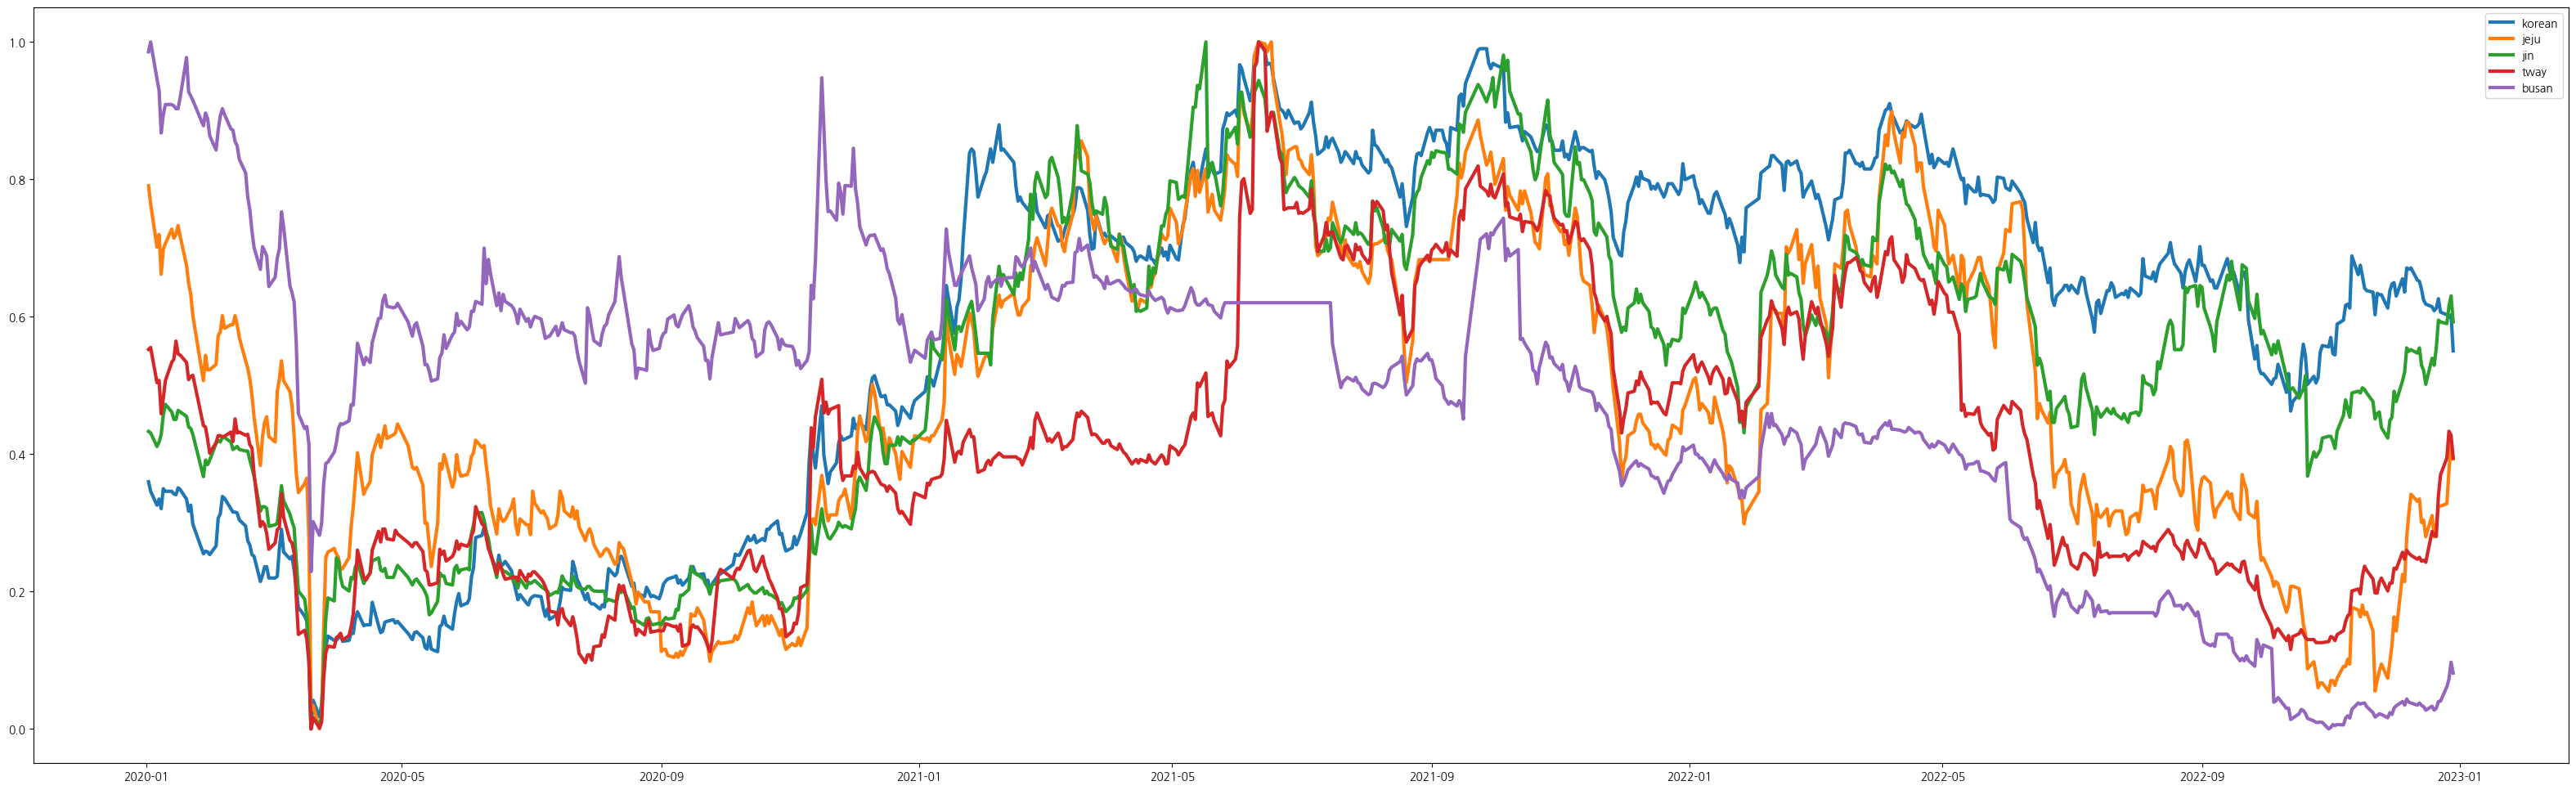

In [89]:
x = airline_scaled.columns[:] # x축(시간 정보)
y = airline_scaled # y축 값(데이터 개수)
mat.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (40, 12)) # 전체 figure 크기
plt.plot(y, linewidth = 3, label = x) # 그래프 시각화
plt.legend()

In [16]:
airline_scaled.corr()

,korean,jeju,jin,tway,busan
korean,1.000000,0.262522,0.828856,0.455673,-0.386055
jeju,0.262522,1.000000,0.685161,0.907270,0.576349
jin,0.828856,0.685161,1.000000,0.750424,0.024465
tway,0.455673,0.907270,0.750424,1.000000,0.446775
busan,-0.386055,0.576349,0.024465,0.446775,1.000000


C:\Users\Junyong\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

C:\Users\Junyong\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Junyong\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


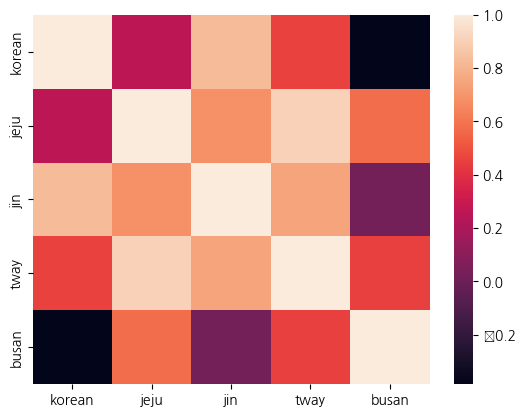

In [21]:
sns.heatmap(airline_scaled.corr())

In [110]:
airline_change.describe()

,korean,jeju,jin,tway,busan
count,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.000659,0.000078,0.000998,0.000339,-0.001333
std,0.026979,0.031746,0.037702,0.035578,0.035017
min,-0.248551,-0.275449,-0.295210,-0.231302,-0.299441
25%,-0.013514,-0.017027,-0.017866,-0.016116,-0.015310
50%,0.000000,0.000000,-0.002916,-0.001072,0.000000
75%,0.011679,0.014830,0.015018,0.013266,0.011046
max,0.156574,0.203381,0.299110,0.299209,0.299173


선정 기업

* 대한항공, 제주항공, 진에어 (유사 경향성)

* 에어부산 (변화율 평균 기준)
* 에어부산 (변화율 표준편차 기준)

In [90]:
kospi = fdr.DataReader('KS11', start = '2020-01-01', end = '2022-12-30')

In [91]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,2175.169922,494700
2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,2176.459961,631600
2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,2155.070068,592700
2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,2175.540039,568200
2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,2151.310059,913800
...,...,...,...,...,...,...
2022-12-23,2325.860107,2333.080078,2311.899902,2313.689941,2313.689941,367000
2022-12-26,2312.540039,2321.919922,2304.199951,2317.139893,2317.139893,427600
2022-12-27,2327.520020,2335.989990,2321.479980,2332.790039,2332.790039,448300


In [92]:
a = kospi.loc['2020-02':'2022-12'].Close
b = airline_close.loc['2020-02':'2022-12',['korean','jin','jeju']]

In [93]:
haha = pd.concat([a, b], axis=1)

In [94]:
scaler = MinMaxScaler()
kospi_covid = scaler.fit_transform(haha)
kospi_covid = pd.DataFrame(kospi_covid, columns = haha.columns, index = haha.index)
kospi_covid

,Close,korean,jin,jeju
Date,,,,
2020-02-03,0.357897,0.266345,0.415489,0.530600
2020-02-04,0.379017,0.306764,0.419879,0.572567
2020-02-05,0.383201,0.313072,0.417659,0.577856
2020-02-06,0.416926,0.338344,0.424218,0.601484
2020-02-07,0.408271,0.335774,0.424218,0.583076
...,...,...,...,...
2022-12-23,0.463338,0.606713,0.592432,0.324404
2022-12-26,0.465206,0.602819,0.589909,0.327838
2022-12-27,0.473676,0.598925,0.615136,0.375919


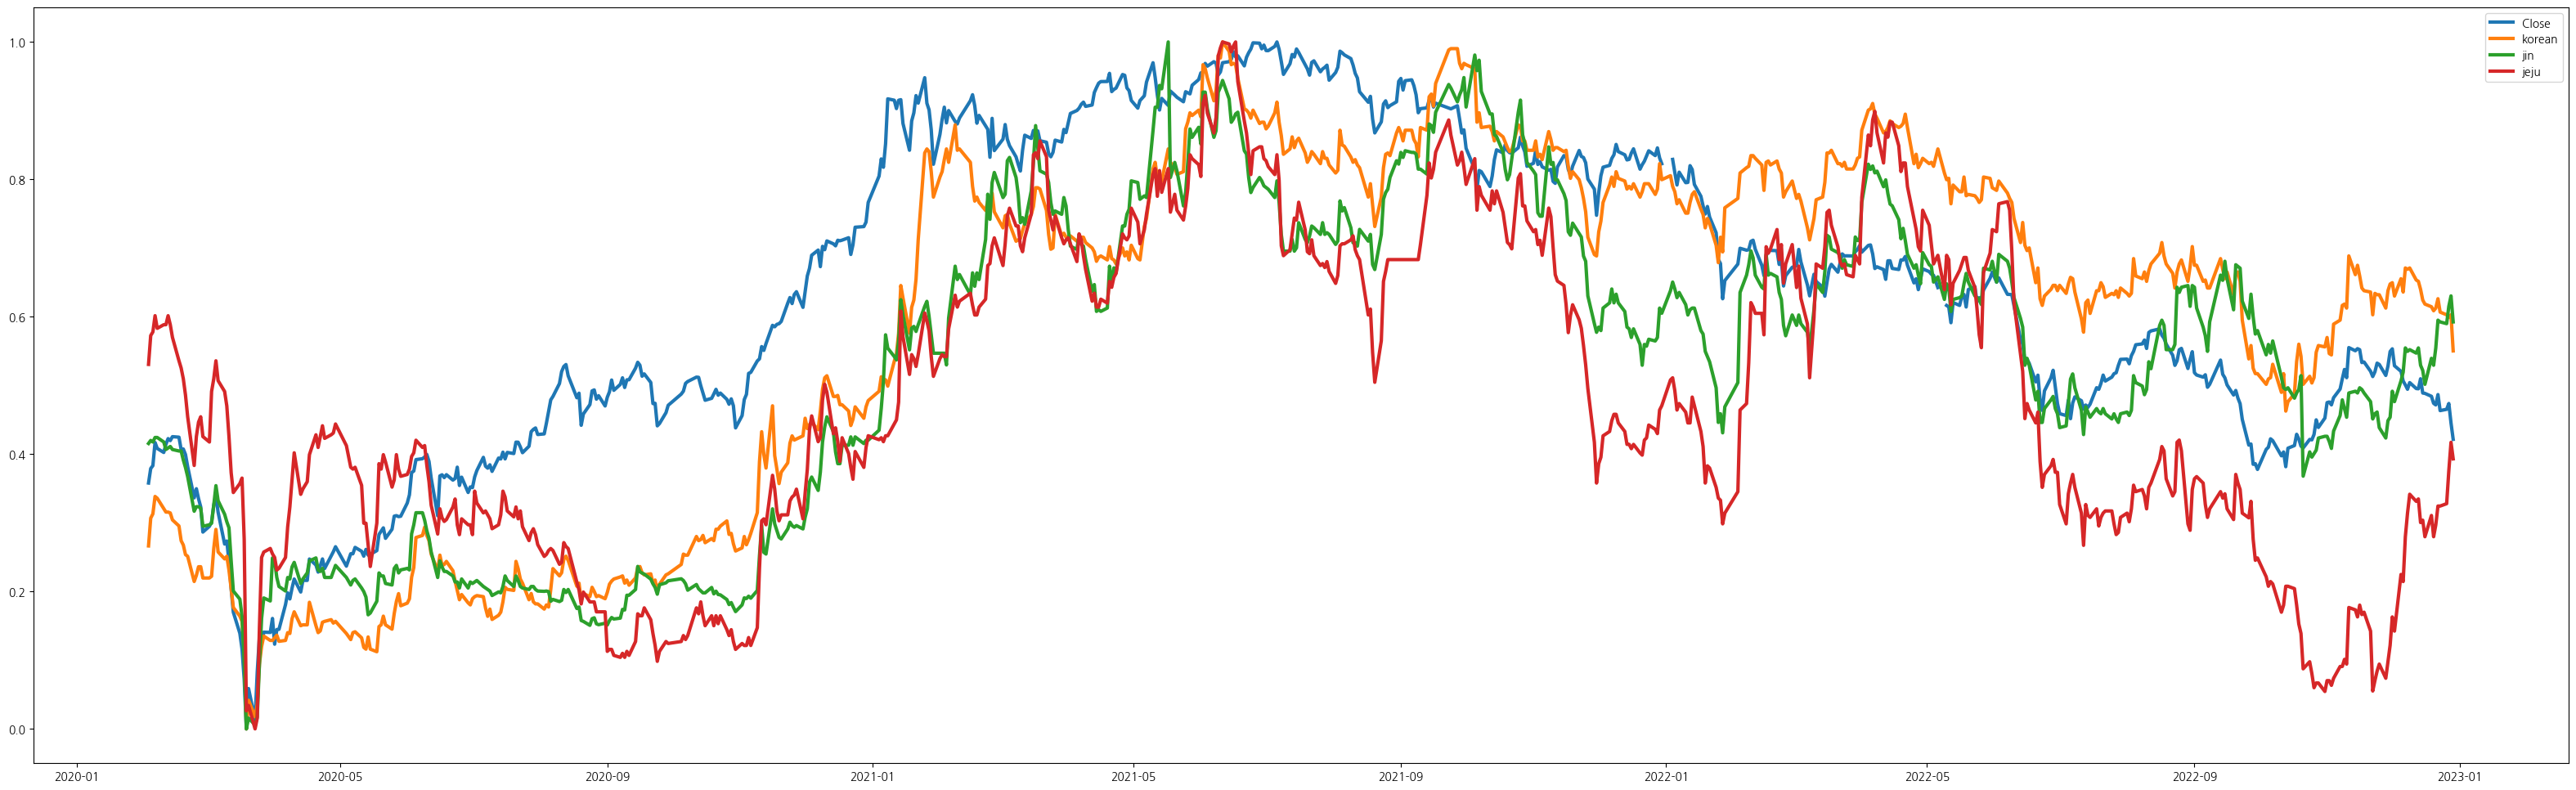

In [95]:
x = kospi_covid.columns[:] # x축(시간 정보)
y = kospi_covid # y축 값(데이터 개수)
mat.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (40, 12)) # 전체 figure 크기
plt.plot(y, linewidth = 3, label = x) # 그래프 시각화
plt.legend()

In [70]:
haha.columns

Index(['Close', 'korean', 'jin', 'jeju'], dtype='object')

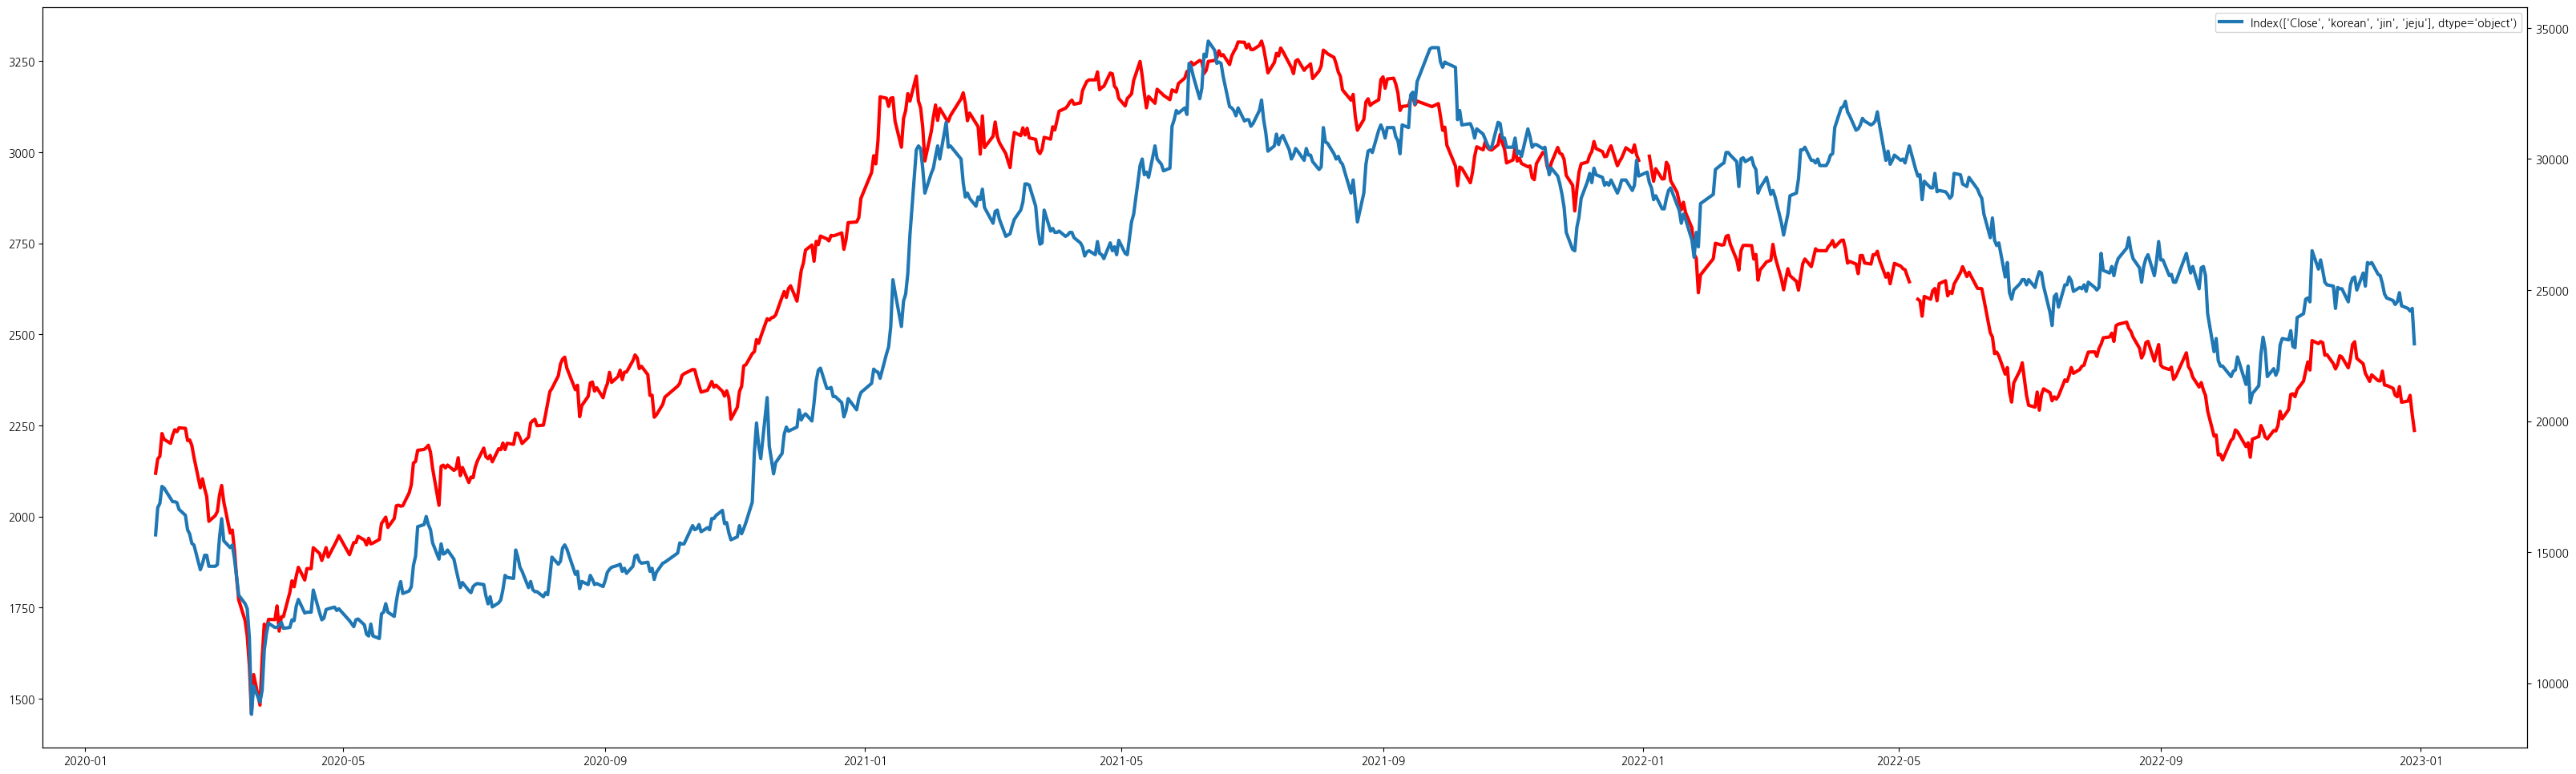

In [68]:
x = kospi_covid.columns[:] # x축(시간 정보)
y1 = haha.Close # y축 값(데이터 개수)
y2 = haha.korean
mat.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (40, 12)) # 전체 figure 크기
plt.plot(y1, linewidth = 3, label = x, color = 'red') # 그래프 시각화
plt.twinx()
plt.plot(y2, linewidth = 3, label = x) # 그래프 시각화
plt.legend()

## 비슷한 경향성/ 특이 회사들 종가, 거래량, 변화율 보여주기

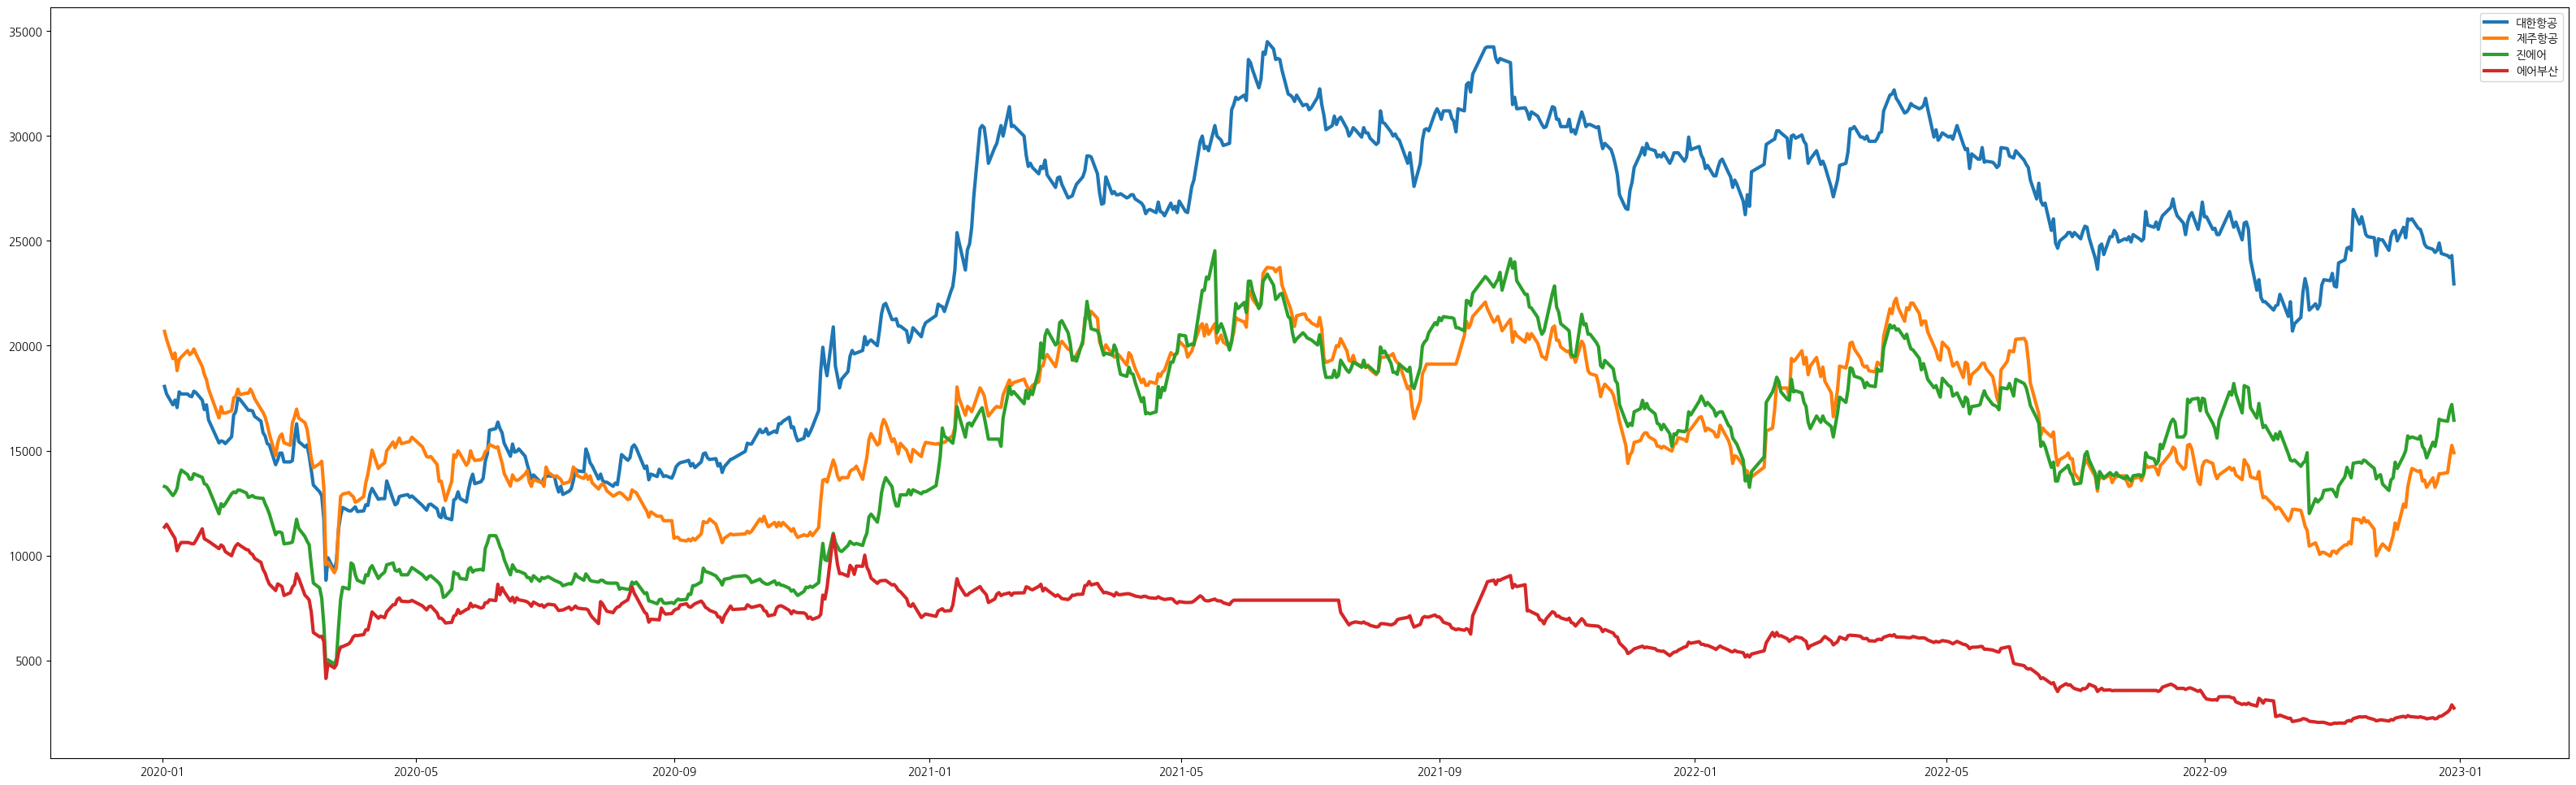

In [108]:
y1 = airline_close.korean
y2 = airline_close.jeju
y3 = airline_close.jin
y4 = airline_close.busan
mat.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (40, 12)) # 전체 figure 크기
plt.plot(y1, linewidth = 3, label = '대한항공') # 대한항공 종가 시각화
plt.plot(y2, linewidth = 3, label = '제주항공') # 제주항공 종가 시각화
plt.plot(y3, linewidth = 3, label = '진에어') # 진에어 종가 시각화
plt.plot(y4, linewidth = 3, label = '에어부산') # 에어부산 종가 시각화
plt.legend()

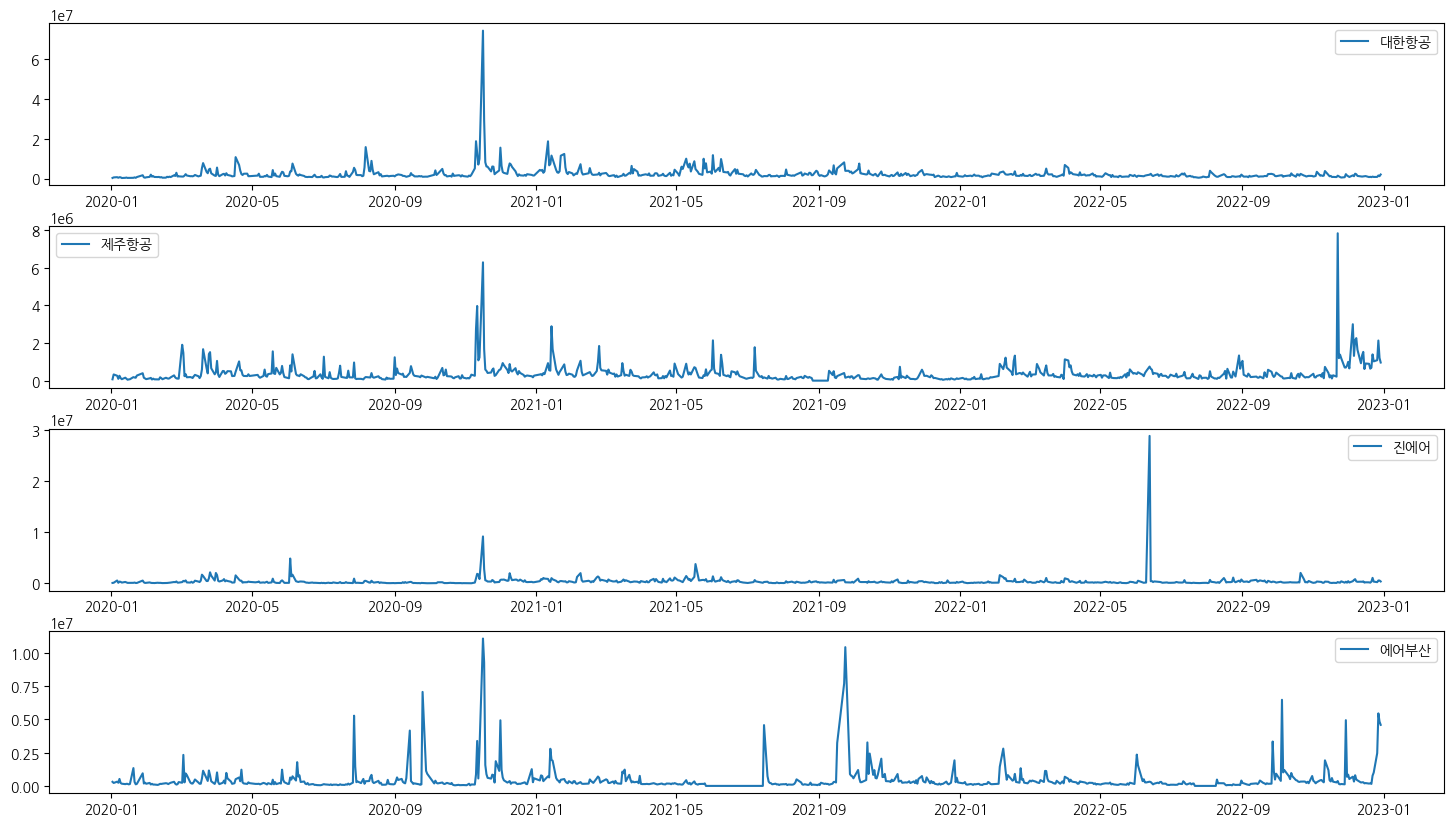

In [104]:
grid = gridspec.GridSpec(4,1)
plt.figure(figsize=(18,10))
plt.subplots_adjust(wspace= 0.1, hspace=0.25)

ax = plt.subplot(grid[0])
ax.plot(airline_volume.korean, label='대한항공')
ax.legend()
ax = plt.subplot(grid[1])
ax.plot(airline_volume.jeju, label='제주항공')
ax.legend()
ax = plt.subplot(grid[2])
ax.plot(airline_volume.jin, label ='진에어')
ax.legend()
ax = plt.subplot(grid[3])
ax.plot(airline_volume.busan, label ='에어부산')
ax.legend()

plt.show()

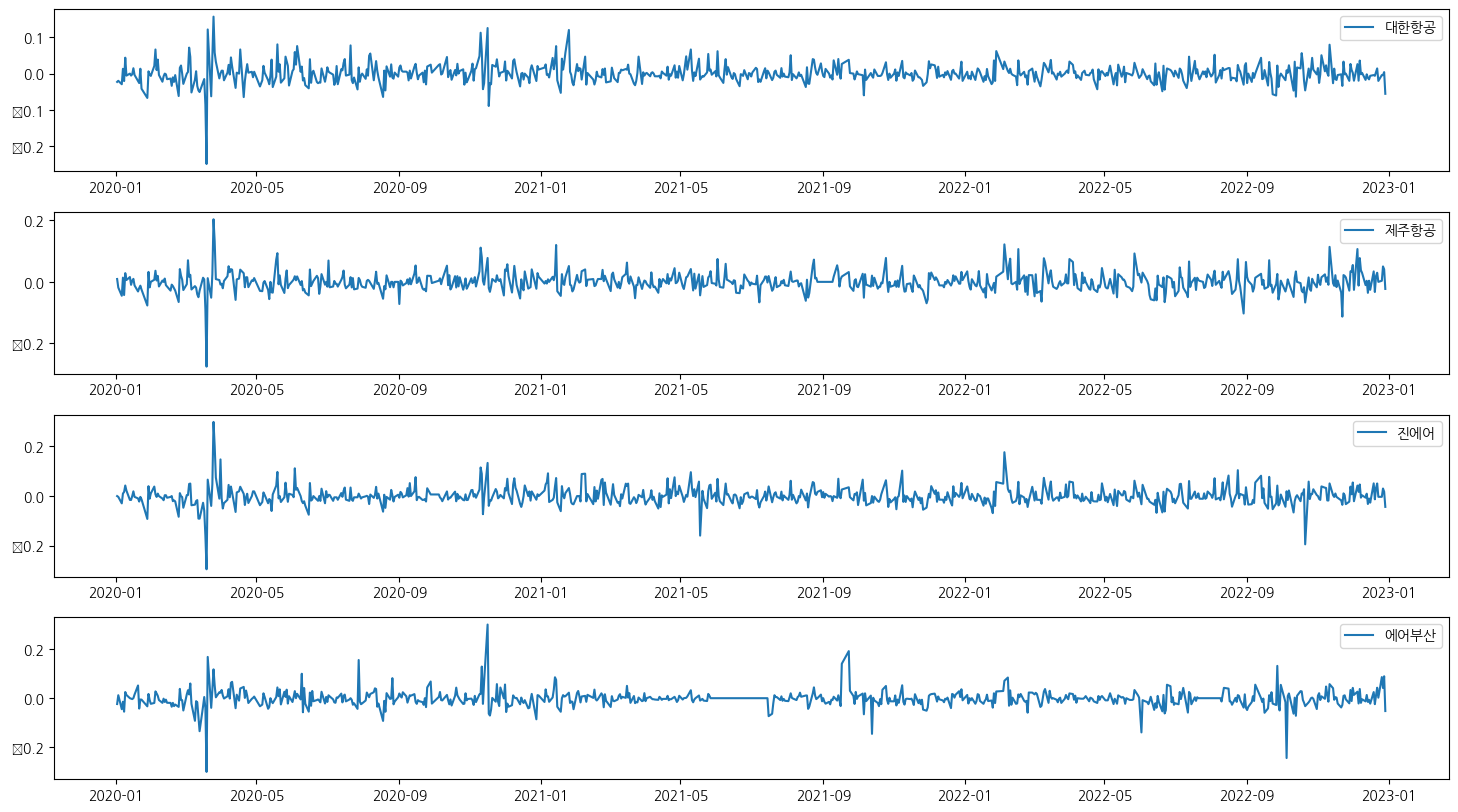

In [107]:
grid = gridspec.GridSpec(4,1)
plt.figure(figsize=(18,10))
plt.subplots_adjust(wspace= 0.1, hspace=0.25)

ax = plt.subplot(grid[0])
ax.plot(airline_change.korean, label='대한항공')
ax.legend()
ax = plt.subplot(grid[1])
ax.plot(airline_change.jeju, label='제주항공')
ax.legend()
ax = plt.subplot(grid[2])
ax.plot(airline_change.jin, label ='진에어')
ax.legend()
ax = plt.subplot(grid[3])
ax.plot(airline_change.busan, label ='에어부산')
ax.legend()

plt.show()

## 항공사 시간

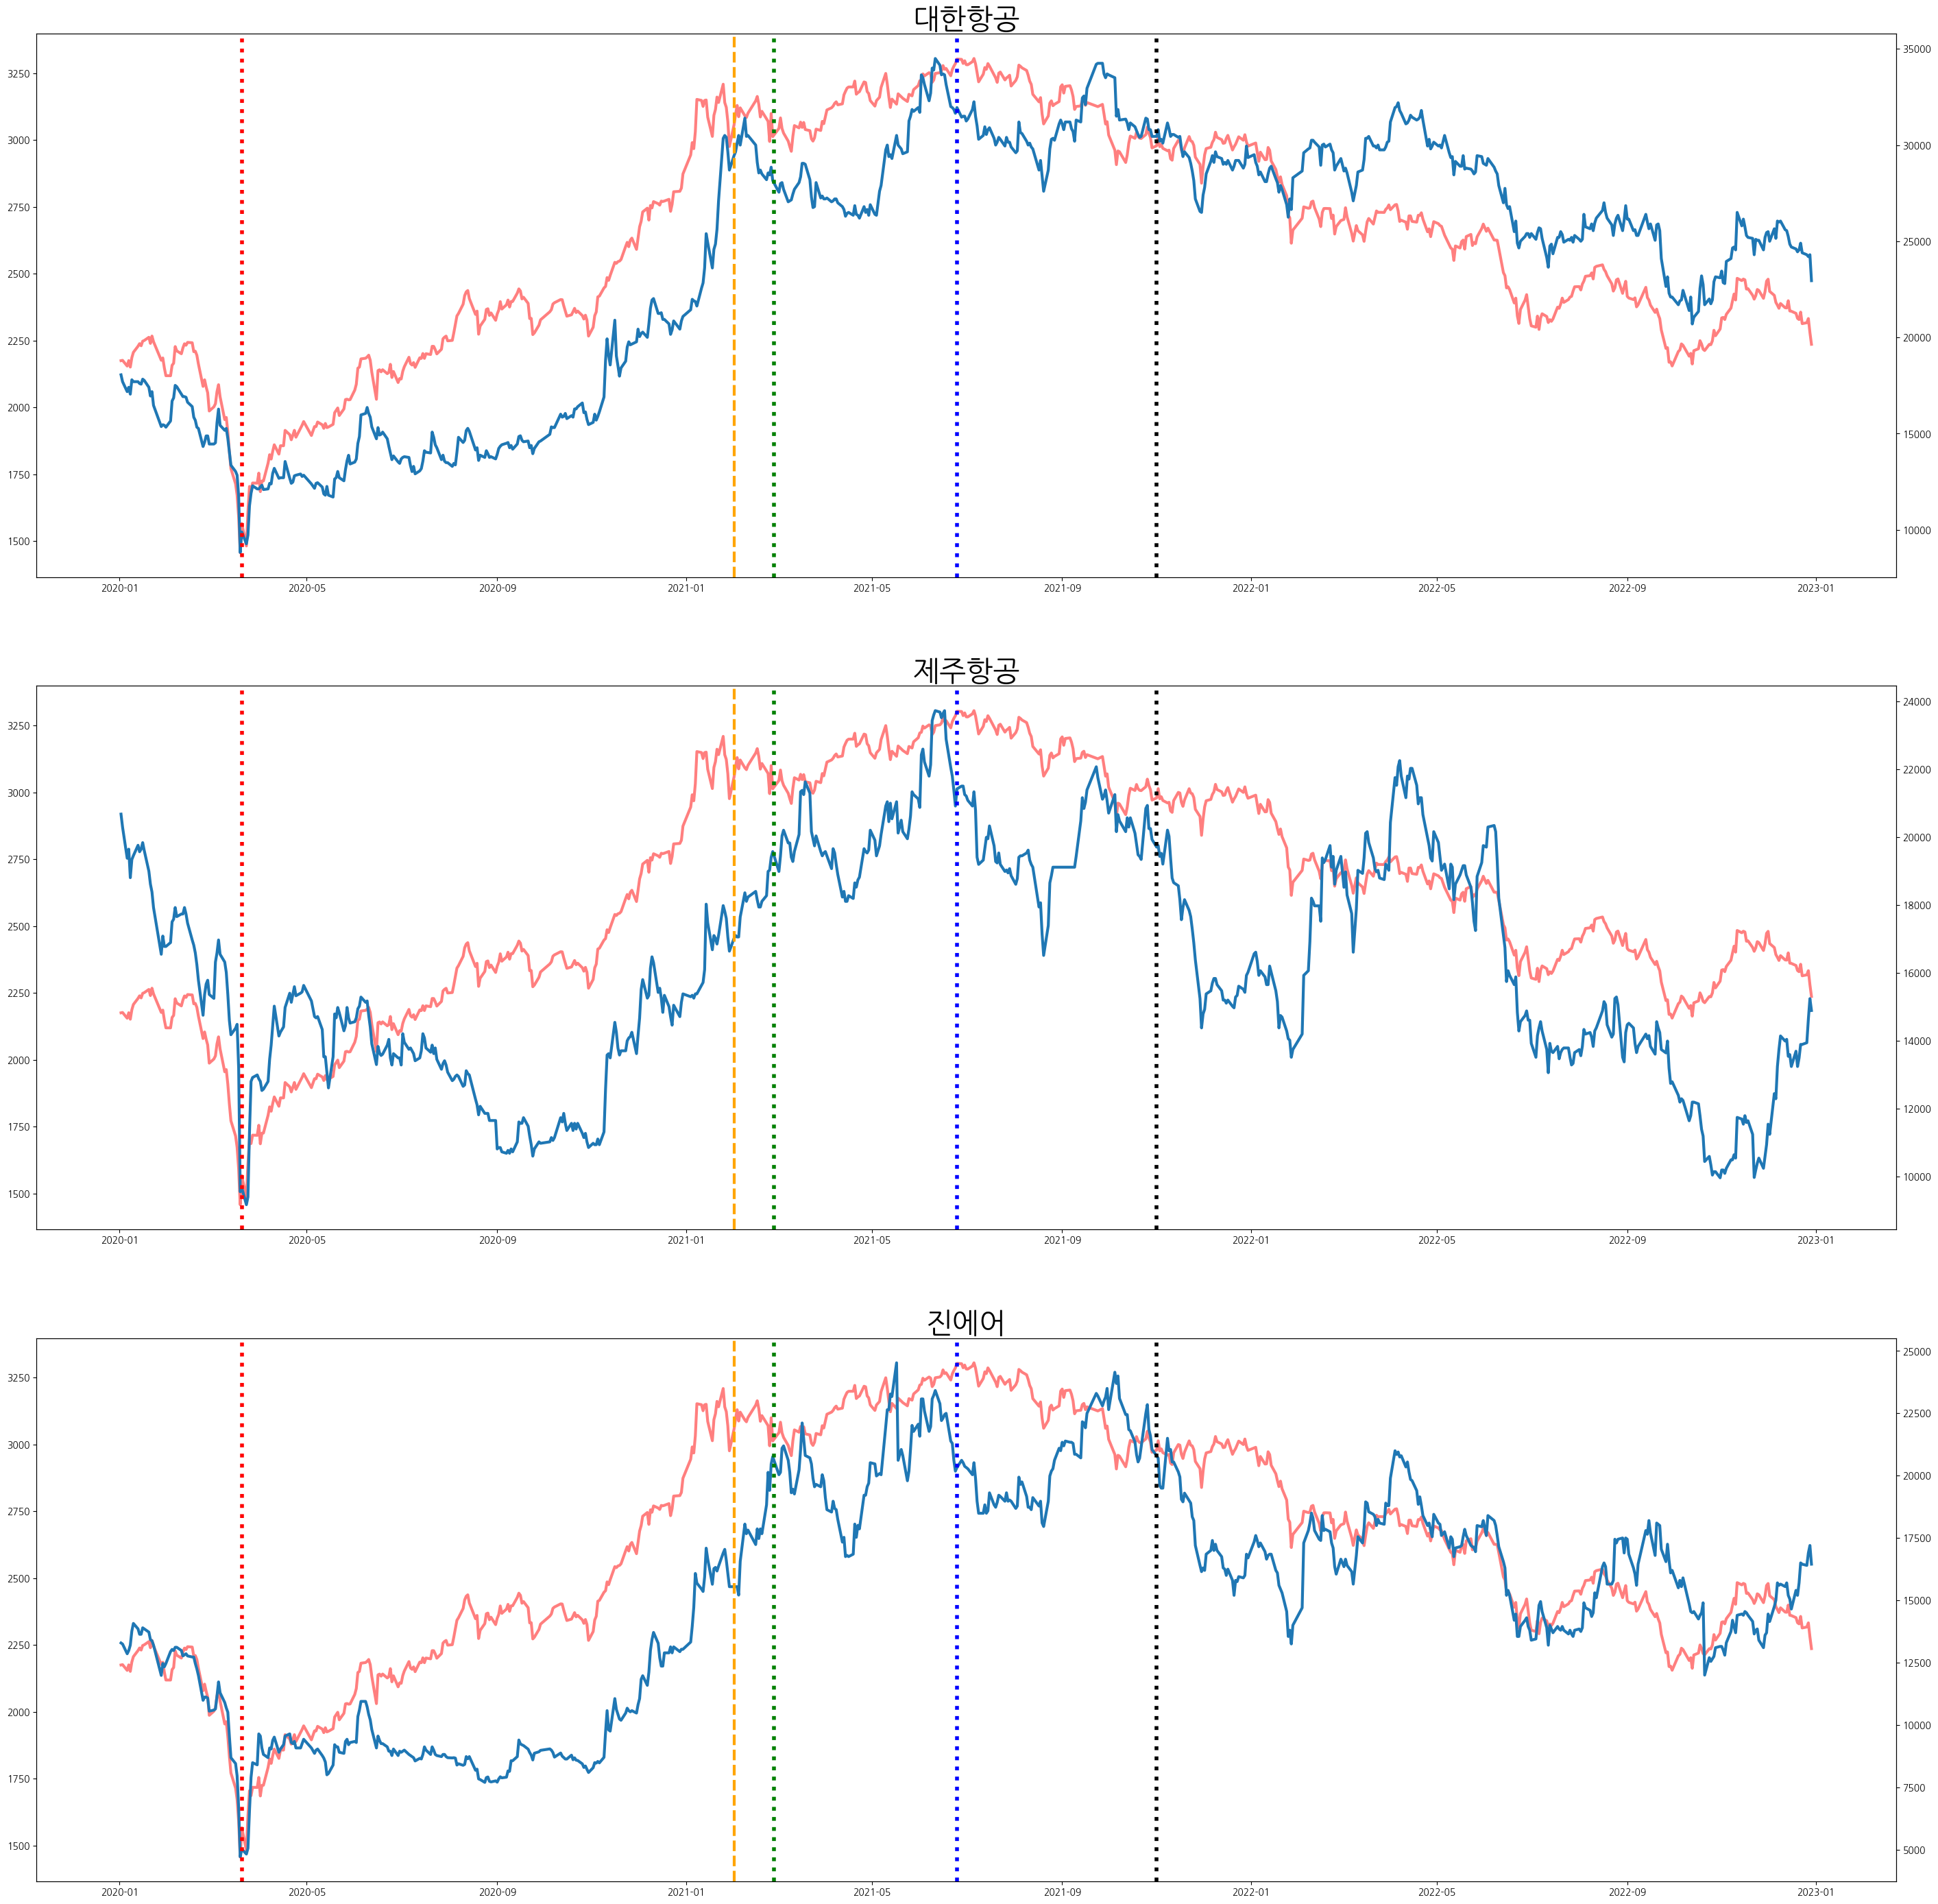

In [98]:
#대한항공
plt.figure(figsize = (35, 35))
plt.subplot(3,1,1)

x = kospi_covid.columns[:] # x축(시간 정보)
mat.rcParams['font.family'] = 'NanumGothic'
plt.title('대한항공',fontsize=30)
plt.plot(kospi.loc['2020-01':'2022-12'].Close, linewidth = 3, label = x, color = 'red',alpha=0.5) # 코스피지수
plt.twinx()
plt.plot(airline_close.korean, linewidth = 3, label = x) # 대한항공

plt.axvline(x=datetime(2020, 3, 20), color='r', linestyle=':', linewidth=4) # 코로나 시작
plt.axvline(x=datetime(2021, 2, 1), color='orange', linestyle='--', linewidth=3) # 백신 관련 기사 다량 배포됨
plt.axvline(x=datetime(2021, 2, 27), color='g', linestyle=':', linewidth=4) # 국내 화이자 첫 접종(az는 2월 26일)
plt.axvline(x=datetime(2021, 6, 25), color='b', linestyle=':', linewidth=4) # 코스피 최대
plt.axvline(x=datetime(2021, 11, 1), color='black', linestyle=':', linewidth=4) # 위드코로나 시행


#제주항공
plt.subplot(3,1,2)
x = kospi_covid.columns[:] # x축(시간 정보)

mat.rcParams['font.family'] = 'NanumGothic'
plt.title('제주항공',fontsize=30)
plt.plot(kospi.loc['2020-01':'2022-12'].Close, linewidth = 3, label = x, color = 'red',alpha=0.5) # 코스피 지수
plt.twinx()
plt.plot(airline_close.jeju, linewidth = 3, label = x) # 제주항공

plt.axvline(x=datetime(2020, 3, 20), color='r', linestyle=':', linewidth=4) # 코로나 시작
plt.axvline(x=datetime(2021, 2, 1), color='orange', linestyle='--', linewidth=3) # 백신 관련 기사 다량 배포됨
plt.axvline(x=datetime(2021, 2, 27), color='g', linestyle=':', linewidth=4) # 국내 화이자 첫 접종(az는 2월 26일)
plt.axvline(x=datetime(2021, 6, 25), color='b', linestyle=':', linewidth=4) # 코스피 최대
plt.axvline(x=datetime(2021, 11, 1), color='black', linestyle=':', linewidth=4) # 위드코로나 시행

#진에어
plt.subplot(3,1,3)
x = kospi_covid.columns[:] # x축(시간 정보)

mat.rcParams['font.family'] = 'NanumGothic'
plt.title('진에어',fontsize=30)
plt.plot(kospi.loc['2020-01':'2022-12'].Close, linewidth = 3, label = x, color = 'red',alpha=0.5) # 코스피 지수
plt.twinx()
plt.plot(airline_close.jin, linewidth = 3, label = x) # 진에어

plt.axvline(x=datetime(2020, 3, 20), color='r', linestyle=':', linewidth=4) # 코로나 시작
plt.axvline(x=datetime(2021, 2, 1), color='orange', linestyle='--', linewidth=3) # 백신 관련 기사 다량 배포됨
plt.axvline(x=datetime(2021, 2, 27), color='g', linestyle=':', linewidth=4) # 국내 화이자 첫 접종(az는 2월 26일)
plt.axvline(x=datetime(2021, 6, 25), color='b', linestyle=':', linewidth=4) # 코스피 최대
plt.axvline(x=datetime(2021, 11, 1), color='black', linestyle=':', linewidth=4) # 위드코로나 시행
 
plt.show()